In [2]:
import bt
import pandas as pd

In [3]:
# download data
data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')

# calculate moving average DataFrame using pandas' rolling_mean
# a rolling mean is a moving average, right?
sma = data.rolling(50).mean()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,6.461977,23.389400,26.409624,135.576202,50.052273
2010-01-05,6.473148,23.396957,27.419405,137.973114,50.311447
2010-01-06,6.370184,23.253365,28.273836,136.500458,50.052273
2010-01-07,6.358409,23.011536,28.351505,139.171600,52.643997
2010-01-08,6.400679,23.170242,27.885454,136.539719,53.777840
...,...,...,...,...,...
2024-05-13,186.279999,412.975098,63.400002,453.559998,159.500000
2024-05-14,187.429993,415.809998,63.590000,458.470001,160.000000
2024-05-15,189.720001,423.079987,64.239998,466.089996,163.470001


In [4]:
sma

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-05-13,172.416760,412.969714,60.007638,411.198600,148.871027
2024-05-14,172.668103,413.002455,60.166308,412.523000,149.505598
2024-05-15,173.064712,413.425554,60.335598,414.026600,150.259760


In [7]:
bt.merge(data, sma)

,aapl,msft,c,gs,ge,aapl,msft,c,gs,ge
Date,,,,,,,,,,
2010-01-04,6.461977,23.389400,26.409624,135.576202,50.052273,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.473148,23.396957,27.419405,137.973114,50.311447,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.370184,23.253365,28.273836,136.500458,50.052273,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.358409,23.011536,28.351505,139.171600,52.643997,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.400679,23.170242,27.885454,136.539719,53.777840,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-05-13,186.279999,412.975098,63.400002,453.559998,159.500000,172.416760,412.969714,60.007638,411.198600,148.871027
2024-05-14,187.429993,415.809998,63.590000,458.470001,160.000000,172.668103,413.002455,60.166308,412.523000,149.505598
2024-05-15,189.720001,423.079987,64.239998,466.089996,163.470001,173.064712,413.425554,60.335598,414.026600,150.259760


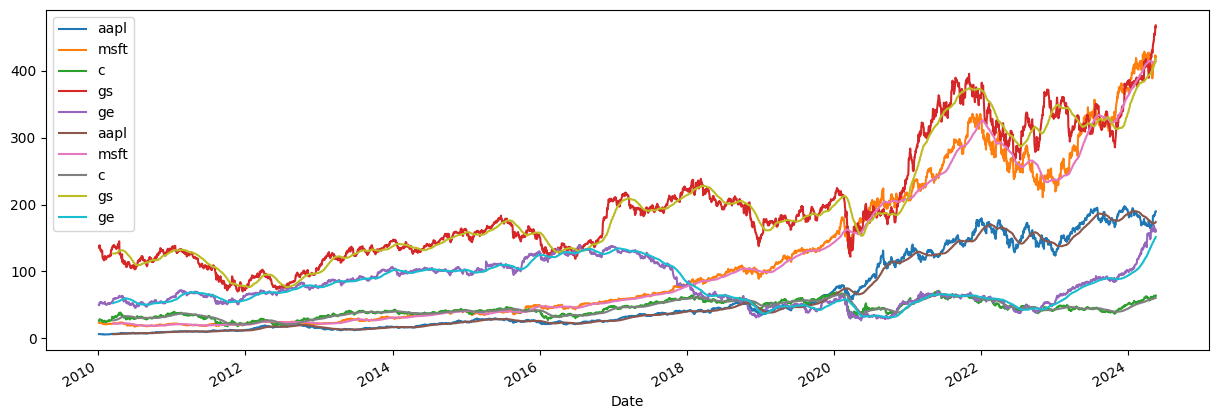

In [5]:
# let's see what the data looks like - this is by no means a pretty chart, but it does the job
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [23]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        # 这里 target.now 每次都是一天的时间，例如 Timestamp('2010-01-04 00:00:00')，符合回测时候的直观理解
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])
            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

In [24]:
signal = data > sma


In [25]:
signal

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,False,False,False,False,False
2010-01-05,False,False,False,False,False
2010-01-06,False,False,False,False,False
2010-01-07,False,False,False,False,False
2010-01-08,False,False,False,False,False
...,...,...,...,...,...
2024-05-13,True,True,True,True,True
2024-05-14,True,True,True,True,True
2024-05-15,True,True,True,True,True


In [26]:
# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)

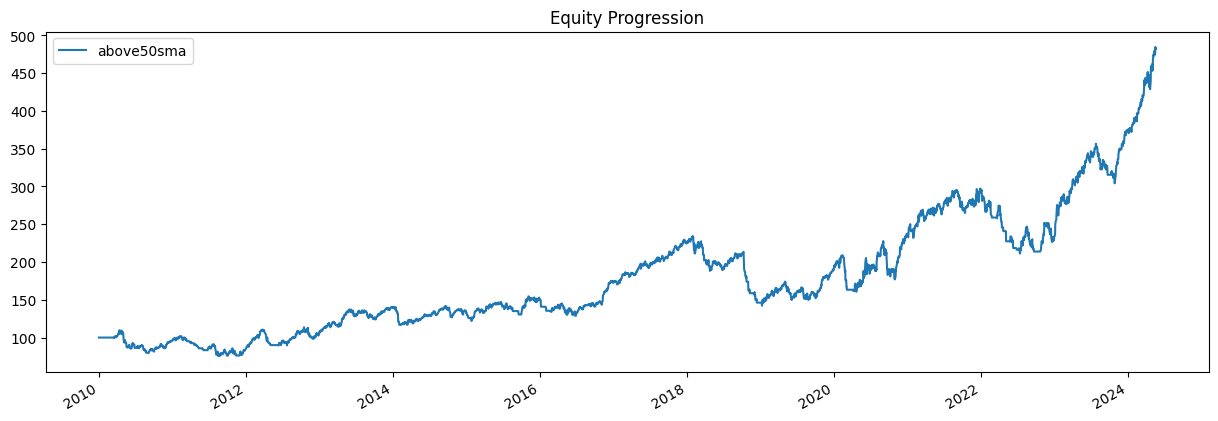

In [27]:
# what does the equity curve look like?
res.plot();

In [28]:
# and some performance stats
res.display()


Stat                 above50sma
-------------------  ------------
Start                2010-01-03
End                  2024-05-17
Risk-free rate       0.00%

Total Return         381.85%
Daily Sharpe         0.66
Daily Sortino        1.03
CAGR                 11.57%
Max Drawdown         -39.25%
Calmar Ratio         0.29

MTD                  5.93%
3m                   21.65%
6m                   38.44%
YTD                  28.74%
1Y                   48.42%
3Y (ann.)            21.24%
5Y (ann.)            23.84%
10Y (ann.)           14.52%
Since Incep. (ann.)  11.57%

Daily Sharpe         0.66
Daily Sortino        1.03
Daily Mean (ann.)    12.83%
Daily Vol (ann.)     19.34%
Daily Skew           -0.56
Daily Kurt           4.50
Best Day             5.82%
Worst Day            -8.26%

Monthly Sharpe       0.61
Monthly Sortino      1.06
Monthly Mean (ann.)  13.48%
Monthly Vol (ann.)   22.16%
Monthly Skew         -0.27
Monthly Kurt         0.64
Best Month           21.65%
Worst Month        

In [29]:
def above_sma(tickers, sma_per=50, start='2010-01-01', name='above_sma'):
    """
    Long securities that are above their n period
    Simple Moving Averages with equal weights.
    """
    # download data
    data = bt.get(tickers, start=start)
    # calc sma
    sma = data.rolling(sma_per).mean()

    # create strategy
    s = bt.Strategy(name, [SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

    # now we create the backtest
    return bt.Backtest(s, data)

In [30]:
# simple backtest to test long-only allocation
def long_only_ew(tickers, start='2010-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

# create the backtests
tickers = 'aapl,msft,c,gs,ge'
sma10 = above_sma(tickers, sma_per=10, name='sma10')
sma20 = above_sma(tickers, sma_per=20, name='sma20')
sma40 = above_sma(tickers, sma_per=40, name='sma40')
benchmark = long_only_ew('spy', name='spy')

# run all the backtests!
res2 = bt.run(sma10, sma20, sma40, benchmark)

[*********************100%%**********************]  1 of 1 completed


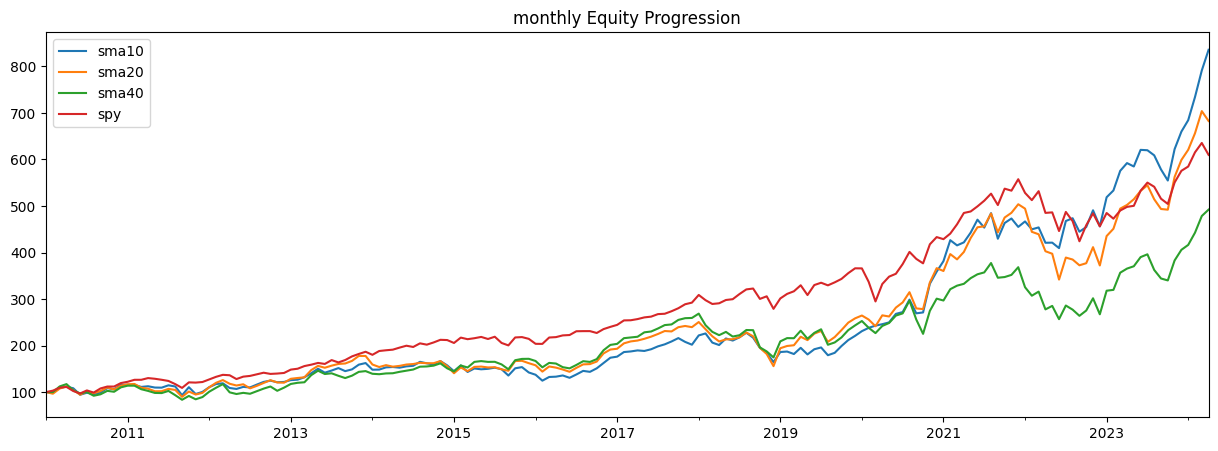

In [31]:
res2.plot(freq='m');

In [32]:
res2.display()

Stat                 sma10       sma20       sma40       spy
-------------------  ----------  ----------  ----------  ----------
Start                2010-01-03  2010-01-03  2010-01-03  2010-01-03
End                  2024-05-17  2024-05-17  2024-05-17  2024-05-17
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         740.19%     624.63%     422.26%     509.51%
Daily Sharpe         0.83        0.80        0.70        0.82
Daily Sortino        1.34        1.27        1.11        1.27
CAGR                 15.97%      14.78%      12.19%      13.41%
Max Drawdown         -31.69%     -38.82%     -35.54%     -33.72%
Calmar Ratio         0.50        0.38        0.34        0.40

MTD                  7.84%       6.14%       6.10%       5.47%
3m                   25.85%      13.07%      21.13%      6.32%
6m                   44.69%      30.73%      38.39%      18.29%
YTD                  36.59%      20.98%      28.70%      11.74%
1Y                   52.85%      42.